References:

Ozeren, E. (n.d.). Word2Vec from scratch with Python. Medium.
https://medium.com/@enozeren/word2vec-from-scratch-with-python-1bba88d9f221

Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Efficient estimation of
word representations in vector space. arXiv preprint arXiv:1301.3781.

In [ ]:
# One Hot Encodings of each word in our Corpus
dogs   = [1, 0, 0, 0, 0, 0]
an     = [0, 1, 0, 0, 0, 0]
cats   = [0, 0, 1, 0, 0, 0]
love   = [0, 0, 0, 1, 0, 0]
this   = [0, 0, 0, 0, 1, 0]
meadow = [0, 0, 0, 0, 0, 1]

In [ ]:
# There are two main problems
#1. A lots of 0 exist in vector and they are all orthogonal to each other.
#2. Cosine similarity is equal to 0, but dogs will be expected to being more similar to cats than meadow.
#3. Machine is not doing well.

In [ ]:
#4.we will define the similar words being used to similar context.
# Define windows size=2 and a co-occurance matrix




Corpus: “Dogs and cats love this meadow.”

center word: “cats”

context words: “dogs”, “and”, “love”, “this”

In [ ]:
#when size =2, we can check two words away canter word  respectively at left and right side.
#Each word take turn  becoming center word and find tow word at the left and right in the corpus.


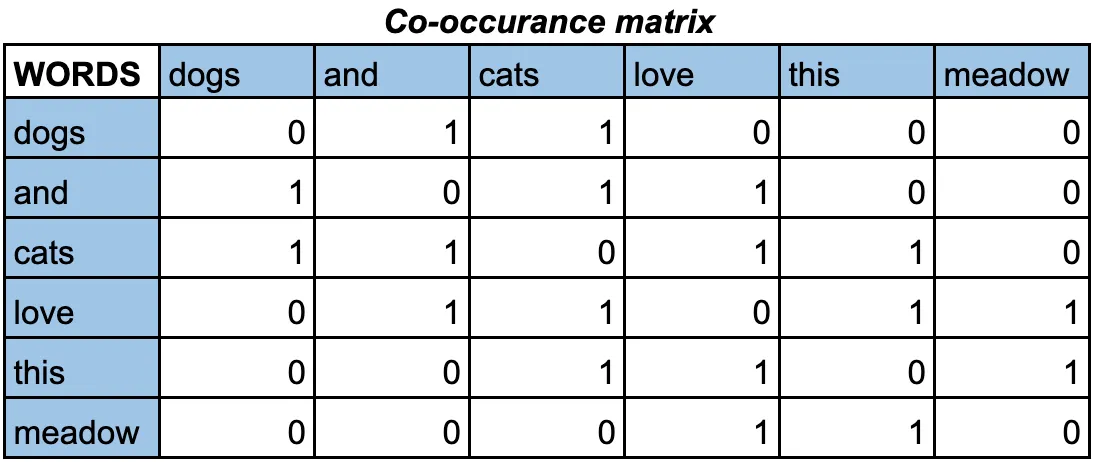

word embeddings will overcome a issue.
The main idea of word embedding is the same as co-occurance matrix that is aimed to have a denser vector from 100-300

 We can see  paper word2Vec,  using neural networks from a big dataset.
 This paper mention 2  approches CBOW and SG to do word embedding.




In [ ]:
# Continuous CBOW
#This will predict the center word given "context word"

#dogs and ? love this

In [ ]:
#Skip-gram Model
#This will preict context word given "center word"

#? ? and ? ?


 They are simple neural networks with one layer without a non-linear activation, and then a softmax layer for the outputs.

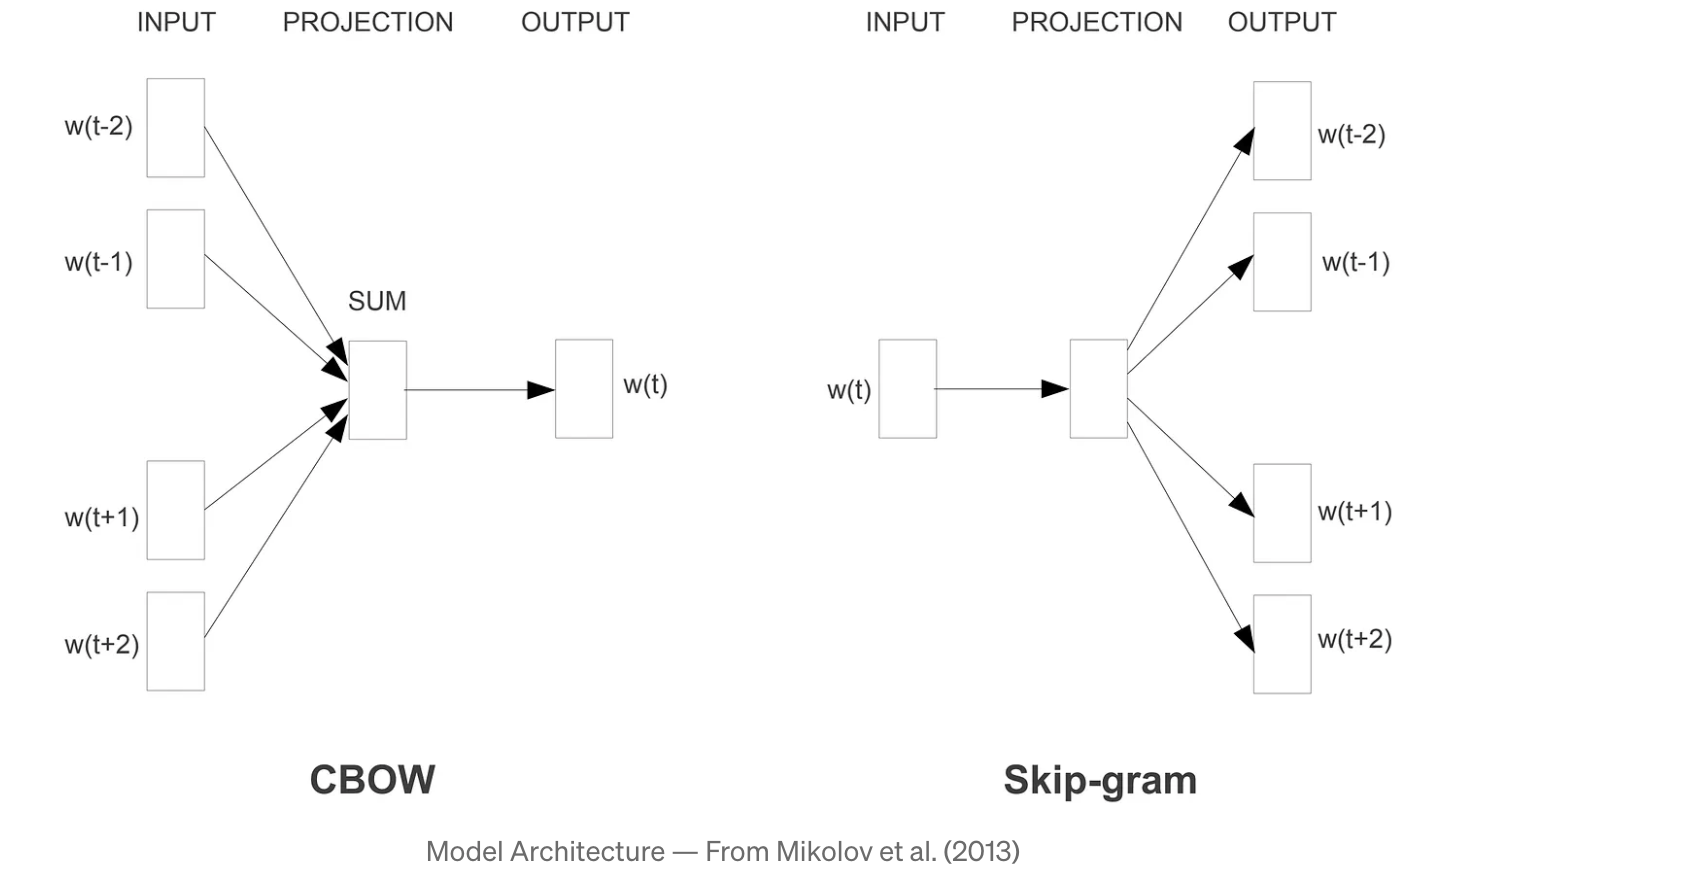

Given lower computational complexity of this model, they could compute  word vectors from a huge dataset

## Training
To train this model, they used  1.6 billiom wordd dataset, using parallel CPU computing units.

# An optimizer Adagrad is a stochastic gradient descent algorithm with adaptive leraning rate.bold text

In [ ]:
import random

# 1.We define 20 words in ourcorpus
dog_cat_words = ['dog', 'cat', 'pet', 'house', 'animal', 'sleep', 'play']
family_words = ['girl', 'boy', 'father', 'mother', 'family', 'house', 'marriage']
king_queen_words = ['crown', 'queen', 'king', 'empire', 'country', 'rule', 'castle']

#2.We will shuffle these words and generate random long sequences to create  out dataset
dog_cat_text = ''
family_text =''
king_queen_text=''
for _ in range (10000):
  random.shuffle(dog_cat_words)
  dog_cat_text = dog_cat_text + ' ' + ' '.join(dog_cat_words)
  random.shuffle(family_words)
  family_text = family_text + ' ' + ' '.join(family_words)
  random.shuffle(king_queen_words)
  king_queen_text = king_queen_text + ' ' + ' '.join(king_queen_words)

#It contains 200k words
small_corpus = dog_cat_text + family_text + king_queen_text
#3.Extract the dataset
file_name = "small_corpus.txt"
with open(file_name,'w') as f:
   f.write(small_corpus)



In [ ]:
file_path = "small_corpus.txt"
with open(file_path, "r+") as f:
  text = f.read()



In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt_tab')
nltk.download('stopwords')

def generate_cbows(text, window_size):
  #1.Lowercase and tokenize the text
  text = text.lower()
  #2.Devide the whole sentece word by word by comma
  words = word_tokenize(text)
  #3.Removed punctuation
  words = [word for word in words if word.isalpha()]

  #4.Remove stop words
  #stop words : “the”, “is”, “are”, “of”, “to”, “and”, “in”, “on”, “at”, “for .etc
  #O(1) in /not in
  stop_words = set(stopwords.words('english'))
  words =[word for word in words if word not in stop_words]

  #5.Create a cbow pairs with a given window size
  cbows = []
  for i, target_word in enumerate(words):
    # Built context with left 2 words and right 2 words
     context_words = words[max(0, i- window_size):i] + words[i+1: i+window_size+1]
     if(len(context_words) == window_size *2):
        cbows.append((context_words, target_word))
  return cbows


# 6.Create cbows
cbows = generate_cbows(text, window_size=3)

#7. Results
for context_words, target_word in cbows [:3]:
  print(f'context words: {context_words}, "target words: "{target_word}')





[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


context words: ['sleep', 'dog', 'cat', 'animal', 'house', 'play'], "target words: "pet
context words: ['dog', 'cat', 'pet', 'house', 'play', 'cat'], "target words: "animal
context words: ['cat', 'pet', 'animal', 'play', 'cat', 'house'], "target words: "house


We have a list ['learning', 'machine', 'models', 'networks', 'important', 'research', 'data']

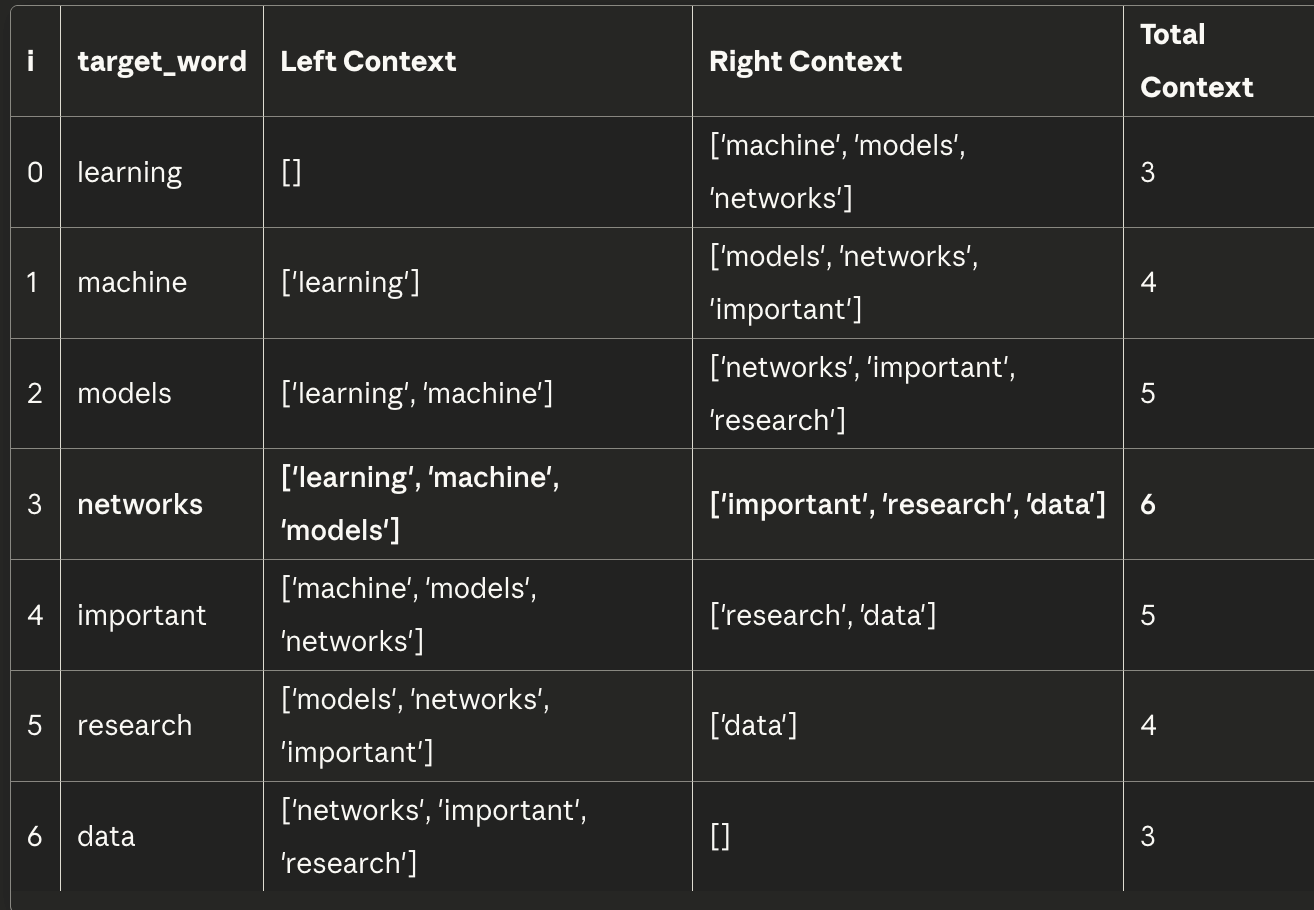

In [ ]:
# We can take a glance at our first training pairs

"""
context words: ['sleep', 'pet', 'cat', 'animal', 'play', 'house'], "target words: "dog
context words: ['pet', 'cat', 'dog', 'play', 'house', 'house'], "target words: "animal
context words: ['cat', 'dog', 'animal', 'house', 'house', 'pet'], "target words: "play
"""




# How are we going to give the texts as input?
### we will give words as one-hot encoded.

# Where are the word embedding vector?
### Actually they are weight parameter of first layer of out model.

# It looks different model architecture of the paper but it is the same.

# Preprocessing

What is one-hot encoding?
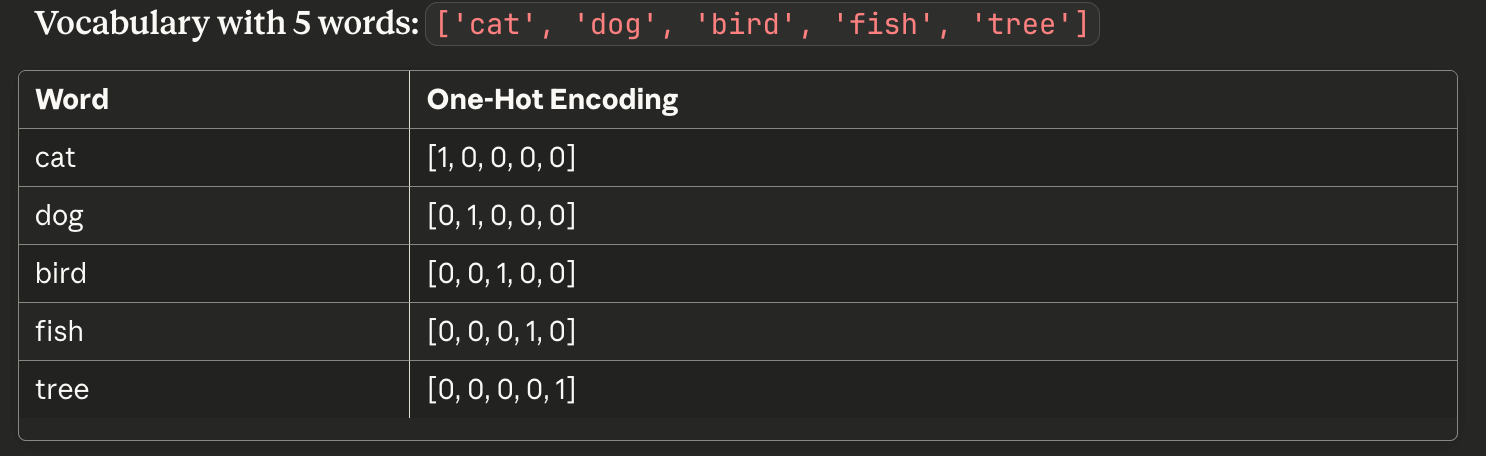

In [7]:

import torch
#1.one - hot encoding
def one_hot_encoding(word, unique_words):
  encoding = []
  for w in unique_words:
    if word == w:
       encoding.append(1)
    else:
       encoding.append(0)
  return torch.tensor(encoding, dtype=torch.float32)

#2.create one-hot encoding for each word
one_hot_encodings = {}
for word in unique_words:
  one_hot_encodings[word]= one_hot_encoding(word,unique_words)


In [8]:
#1. Covert Cbow pairs to vector pairs
cbow_vector_pairs = []
for context_words, target_word in cbows:
  context_vectors = []
  for word in context_words:
    context_vectors.append(one_hot_encodings[word])
  target_vector = one_hot_encodings[target_word]
  cbow_vector_pairs.append((context_vectors, target_vector))

"""
Input: (['cat', 'dog', 'bird'], 'fish'):
Output:  ([tensor([1,0,0,0,0]), tensor([0,1,0,0,0]), tensor([0,0,1,0,0])], tensor([0,0,0,1,0]))
"""
#2. Sum all context vectors for each target_word
# Target [summed_context, list]

#torch.sum adding all vectors of each row
"""
[tensor([1,0,0,0,0]),
 tensor([0,1,0,0,0]),
 tensor([0,0,1,0,0])]

 [[1,0,0,0,0],
 [0,1,0,0,0],
 [0,0,1,0,0]]

 [1,1,1,0,0]

"""
cbow_vector_pairs_new = []
for context_vectors, target_vector in cbow_vector_pairs:
  summed_context = torch.sum(torch.stack(context_vectors), dim =0)
  cbow_vector_pairs_new.append((summed_context, target_vector))
cbow_vector_pairs = cbow_vector_pairs_new

"""
Take a look at cbow_vector_pairs[0]

(tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
         0., 1.]),
 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]))
"""

'\nTake a look at cbow_vector_pairs[0]\n\n(tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,\n         0., 1.]),\n tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,\n         0., 0.]))\n'

# We see that there is one input vector which is the sum of the input context words and one

Let’s first understand our model structure.

To keep the illustration below simple, let’s assume we have 4 words in our vocabulary and the window size = 1.

Our training example: cats love this

Our inputs: cats, this

Our output : love

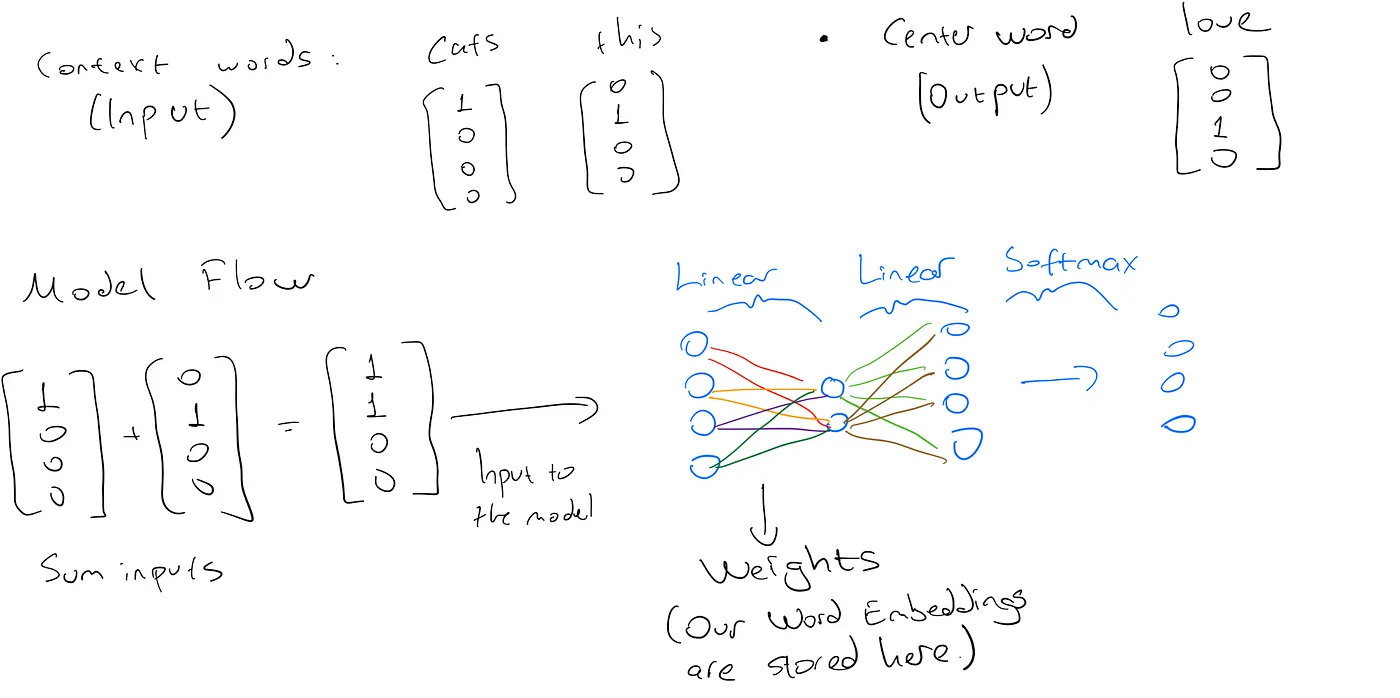

# W1 vs W2: Detailed Explanation with Examples

## Overview

In the NaiveWord2Vec model, W1 and W2 are two weight matrices that work together to transform input data through the network.

| Aspect | W1 | W2 |
|--------|-----|-----|
| **Shape** | `(VOCAB_SIZE, VECTOR_DIM)` | `(VECTOR_DIM, VOCAB_SIZE)` |
| **Role** | Encoder (Encoding Layer) | Decoder (Decoding Layer) |
| **Input Dimension** | VOCAB_SIZE (5) | VECTOR_DIM (3) |
| **Output Dimension** | VECTOR_DIM (3) | VOCAB_SIZE (5) |
| **Function** | one-hot → word vector | word vector → prediction scores |
| **Purpose** | Compress information | Reconstruct predictions |

---

## Setup Parameters

Let's assume:
- **VOCAB_SIZE** = 5 (words: cat, dog, bird, fish, tree)
- **VECTOR_DIM** = 3 (hidden layer dimension)

```python
import torch
import torch.nn as nn

class NaiveWord2Vec(nn.Module):
    def __init__(self, VOCAB_SIZE, VECTOR_DIM):
        super().__init__()
        self.vocab_size = VOCAB_SIZE
        self.vector_dim = VECTOR_DIM
        
        # W1: Encoder - transforms one-hot to word vectors
        self.W1 = nn.Parameter(
            data=torch.randn(self.vocab_size, self.vector_dim),  # [5, 3]
            requires_grad=True
        )
        
        # W2: Decoder - transforms word vectors back to vocab space
        self.W2 = nn.Parameter(
            data=torch.randn(self.vector_dim, self.vocab_size),  # [3, 5]
            requires_grad=True
        )

model = NaiveWord2Vec(VOCAB_SIZE=5, VECTOR_DIM=3)
```

---

## W1: Encoding Layer

### Definition

```python
self.W1 = nn.Parameter(
    data=torch.randn(5, 3),  # Shape: [VOCAB_SIZE, VECTOR_DIM]
    requires_grad=True
)
```

### Shape and Visualization

**Shape:** `[5 rows (vocab), 3 columns (vector dimension)]`

```
W1 Matrix (5 × 3):
┌──────────────────────────┐
│  0.52   -0.12    0.89    │ ← cat vector weights
│ -0.45    0.23   -0.35    │ ← dog vector weights
│  0.12    0.98   -0.56    │ ← bird vector weights
│ -0.78    0.11    0.22    │ ← fish vector weights
│  0.33   -0.44    0.55    │ ← tree vector weights
└──────────────────────────┘
 ↑       ↑       ↑
 dim1   dim2   dim3
 (hidden layer dimensions)
```

### Function

**W1 converts one-hot encoded words to dense word vectors**

Each row in W1 represents the word embedding for that vocabulary word:
- Row 0 (W1[0]): embedding for word "cat"
- Row 1 (W1[1]): embedding for word "dog"
- Row 2 (W1[2]): embedding for word "bird"
- etc.

### Example: One-Hot to Word Vector

```python
# Input: one-hot encoding of "cat"
cat_onehot = torch.tensor([[1., 0., 0., 0., 0.]])  # Shape: [1, 5]

# Multiply with W1
cat_vector = cat_onehot @ W1
# [1, 5] @ [5, 3] = [1, 3]

# Result: The embedding of "cat"
# tensor([[0.52, -0.12, 0.89]])
```

**Why?** Matrix multiplication extracts the first row of W1:
```
[1, 0, 0, 0, 0] @ W1 = 1×(row0) + 0×(row1) + ... = row0
                      = [0.52, -0.12, 0.89]
```

### Multiple Words Example

```python
# Context words: [cat, dog, bird]
context_onehot = torch.tensor([[1., 0., 0., 0., 0.],
                                [0., 1., 0., 0., 0.],
                                [0., 0., 1., 0., 0.]])  # Shape: [3, 5]

# Get embeddings
context_vectors = context_onehot @ W1
# [3, 5] @ [5, 3] = [3, 3]

# Result:
# tensor([[0.52, -0.12, 0.89],      # cat embedding
#         [-0.45, 0.23, -0.35],     # dog embedding
#         [0.12, 0.98, -0.56]])     # bird embedding
```

---

## W2: Decoding Layer

### Definition

```python
self.W2 = nn.Parameter(
    data=torch.randn(3, 5),  # Shape: [VECTOR_DIM, VOCAB_SIZE]
    requires_grad=True
)
```

### Shape and Visualization

**Shape:** `[3 rows (vector dimension), 5 columns (vocab)]`

```
W2 Matrix (3 × 5):
┌──────────────────────────────────────┐
│  0.15   0.42  -0.33   0.78  -0.21    │ ← Hidden dim 1 scores
│ -0.67   0.54   0.89  -0.12   0.45    │ ← Hidden dim 2 scores
│  0.23  -0.88   0.34   0.56  -0.77    │ ← Hidden dim 3 scores
└──────────────────────────────────────┘
  ↑      ↑      ↑      ↑      ↑
 cat    dog   bird   fish   tree
 (target word predictions)
```

### Function

**W2 transforms word vectors back to the vocabulary space**

This allows the model to predict which word should appear as the target.

### Example: Word Vector to Prediction

```python
# Input: word vector (hidden representation)
word_vector = torch.tensor([[0.52, -0.12, 0.89]])  # Shape: [1, 3]

# Multiply with W2
prediction_scores = word_vector @ W2
# [1, 3] @ [3, 5] = [1, 5]

# Result: scores for each word in vocabulary
# tensor([[0.45, -0.23, 0.78, 0.12, -0.34]])
#          cat    dog   bird  fish   tree
```

---

## Forward Pass: Complete Example

### Step-by-Step Execution

```python
import torch
import torch.nn as nn

# Initialize model
model = NaiveWord2Vec(VOCAB_SIZE=5, VECTOR_DIM=3)

# Input: Sum of context one-hot vectors
# Context: ['cat', 'dog', 'bird']
# Sum: [1+0+0, 0+1+0, 0+0+1, 0+0+0, 0+0+0] = [1, 1, 1, 0, 0]
X = torch.tensor([[1., 1., 1., 0., 0.]])  # Shape: [1, 5]

# Forward pass
def forward(self, X):
    # Step 1: Encoding (X @ W1)
    hidden = X @ self.W1
    # [1, 5] @ [5, 3] = [1, 3]
    
    # Step 2: Decoding (hidden @ W2)
    output = hidden @ self.W2
    # [1, 3] @ [3, 5] = [1, 5]
    
    return output

output = forward(model, X)
```

### Detailed Calculation

**Input:**
```
X = [1, 1, 1, 0, 0]  (sum of cat, dog, bird one-hot vectors)
```

**Step 1: Encoding (X @ W1)**
```
[1, 1, 1, 0, 0] @ W1 =
1×[0.52, -0.12, 0.89] + 1×[-0.45, 0.23, -0.35] + 1×[0.12, 0.98, -0.56] + ...

= [0.52-0.45+0.12, -0.12+0.23+0.98, 0.89-0.35-0.56]
= [0.19, 1.09, -0.02]

hidden = [0.19, 1.09, -0.02]  # Shape: [1, 3]
```

**Step 2: Decoding (hidden @ W2)**
```
[0.19, 1.09, -0.02] @ W2 =
0.19×[0.15, 0.42, -0.33, 0.78, -0.21] +
1.09×[-0.67, 0.54, 0.89, -0.12, 0.45] +
-0.02×[0.23, -0.88, 0.34, 0.56, -0.77]

= [0.0285-0.7303-0.0046, 0.0798+0.5886+0.0176, ...]
= [-0.7064, 0.6860, ..., ...]

output = [-0.7064, 0.6860, 0.8931, 0.8204, -0.3142]
#         (cat)    (dog)   (bird)  (fish)  (tree)
```

**Output Interpretation:**
- cat score: -0.7064 (low probability)
- dog score: 0.6860 (medium probability)
- bird score: 0.8931 (high probability)
- fish score: 0.8204 (high probability)
- tree score: -0.3142 (low probability)

---

## Architecture Diagram

```
INPUT              W1 (Encoder)        HIDDEN          W2 (Decoder)       OUTPUT
(one-hot)          [5 × 3]             [1 × 3]         [3 × 5]            (scores)
                                                        
[1, 1, 1, 0, 0] ──────@────→ [0.19, 1.09, -0.02] ──────@────→ [-0.71, 0.69, 0.89, 0.82, -0.31]
    [1×5]                         [1×3]                           [1×5]
                                                        
(cat+dog+bird)  Compress to      Word vectors      Transform to      Prediction scores
                semantic space                    vocabulary space   (logits)
```

---

## Weight Matrix Roles

### W1: Word Embedding Matrix

**After training, each row of W1 is a word's embedding:**

```python
# Extract word vectors from W1
embeddings = model.W1.data  # Shape: [5, 3]

cat_embedding = embeddings[0]     # [0.52, -0.12, 0.89]
dog_embedding = embeddings[1]     # [-0.45, 0.23, -0.35]
bird_embedding = embeddings[2]    # [0.12, 0.98, -0.56]
fish_embedding = embeddings[3]    # [-0.78, 0.11, 0.22]
tree_embedding = embeddings[4]    # [0.33, -0.44, 0.55]

# These embeddings capture semantic meaning!
# Similar words will have similar embeddings
```

**Usage:** W1 is the final product we keep after training. It can be used for:
- Word similarity calculations
- Downstream NLP tasks
- Visualizing word relationships

### W2: Output Transformation Matrix

**W2 is used during training to make predictions:**

```python
# During training:
# 1. Get hidden representation via W1
# 2. Predict target word via W2
# 3. Compare with actual target
# 4. Update both W1 and W2

# After training:
# We typically discard W2, keeping only W1
```

---

## Key Differences Summary

| Aspect | W1 | W2 |
|--------|-----|-----|
| **Initialization** | `torch.randn(5, 3)` | `torch.randn(3, 5)` |
| **Row meaning** | Word embeddings | Hidden dimension contributions |
| **Column meaning** | Vector dimensions | Vocabulary words |
| **Operation** | one-hot @ W1 = embedding | embedding @ W2 = scores |
| **After training** | **KEEP** (embeddings) | **DISCARD** (no longer needed) |
| **Dimensionality** | 5×3 = 15 parameters | 3×5 = 15 parameters |
| **Analogy** | Compression codec | Decompression codec |

---

## Complete Python Example

```python
import torch
import torch.nn as nn

class NaiveWord2Vec(nn.Module):
    def __init__(self, VOCAB_SIZE, VECTOR_DIM):
        super().__init__()
        self.W1 = nn.Parameter(
            data=torch.randn(VOCAB_SIZE, VECTOR_DIM),
            requires_grad=True
        )
        self.W2 = nn.Parameter(
            data=torch.randn(VECTOR_DIM, VOCAB_SIZE),
            requires_grad=True
        )
    
    def forward(self, X):
        hidden = X @ self.W1          # Encoding: [1,5] @ [5,3] = [1,3]
        output = hidden @ self.W2     # Decoding: [1,3] @ [3,5] = [1,5]
        return output

# Create model
model = NaiveWord2Vec(VOCAB_SIZE=5, VECTOR_DIM=3)

# Input: context vector [cat, dog, bird] = [1, 1, 1, 0, 0]
X = torch.tensor([[1., 1., 1., 0., 0.]])

# Forward pass
output = model(X)
print("Output shape:", output.shape)  # [1, 5]
print("Output scores:", output)       # Scores for each word

# Extract embeddings (W1 is the word embeddings!)
embeddings = model.W1.data
print("\nWord embeddings (W1):")
print("Cat embedding:", embeddings[0])
print("Dog embedding:", embeddings[1])
```

---

## Training Process

During training:

1. **Input:** Sum of context one-hot vectors → Shape: [1, 5]
2. **Encoding:** X @ W1 → Hidden vector → Shape: [1, 3]
3. **Decoding:** hidden @ W2 → Prediction scores → Shape: [1, 5]
4. **Loss:** Compare scores with actual target word (one-hot)
5. **Backprop:** Update both W1 and W2 gradients
6. **Result:** W1 learns meaningful word embeddings

After many iterations:
- **W1** contains semantic word embeddings
- **W2** is a helper matrix that can be discarded

---

## Conclusion

- **W1** is the encoder that converts sparse one-hot vectors to dense word embeddings
- **W2** is the decoder that transforms embeddings back to vocabulary space for prediction
- **After training, W1 is the real product** - a learned representation of word meanings
- **W2** is necessary during training but typically discarded afterward